In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

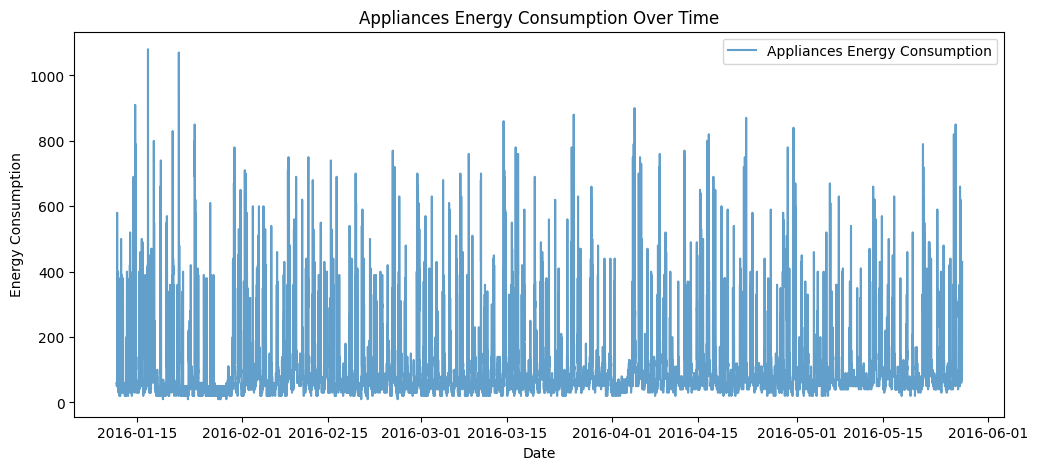

In [5]:

url = "https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv"
data = pd.read_csv(url, parse_dates=['date'], index_col='date')

# 2.2.1: Plot appliances energy consumption for the whole period and a closer look at any one week of consumption

plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Appliances'], label='Appliances Energy Consumption', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Appliances Energy Consumption Over Time")
plt.legend()
plt.show()



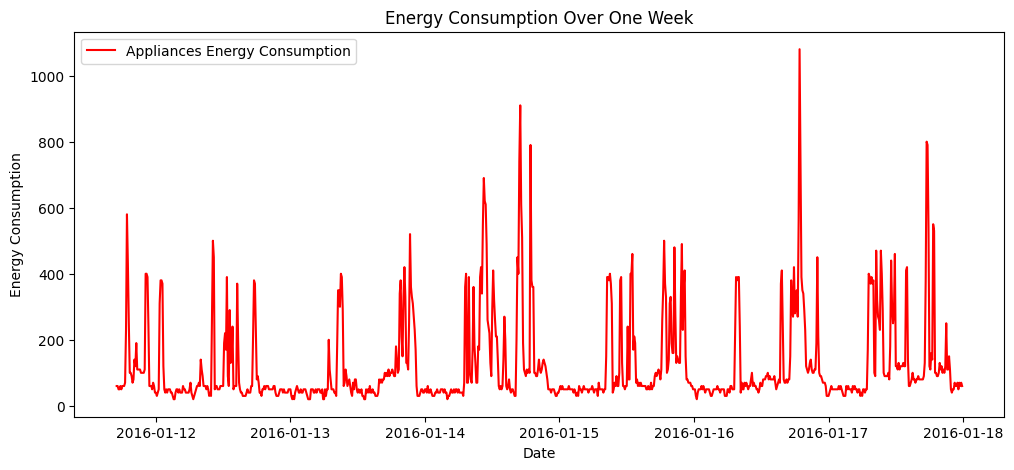

In [6]:
# One week

one_week = data.loc['2016-01-11':'2016-01-17']
plt.figure(figsize=(12, 5))
plt.plot(one_week.index, one_week['Appliances'], label='Appliances Energy Consumption', color='red')
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Over One Week")
plt.legend()
plt.show()



/tmp/ipykernel_46640/2095418283.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weekly_data = one_week.resample('H').mean()


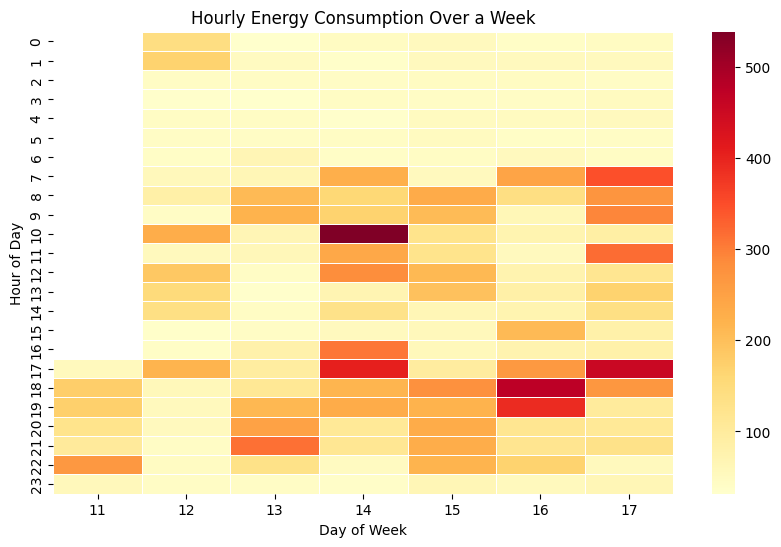

In [7]:
# 2.2.2: Heatmap of hourly consumption for a week

weekly_data = one_week.resample('H').mean()
heatmap_data = weekly_data.pivot_table(values='Appliances', index=weekly_data.index.hour, columns=weekly_data.index.day)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, annot=False)
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.title("Hourly Energy Consumption Over a Week")
plt.show()



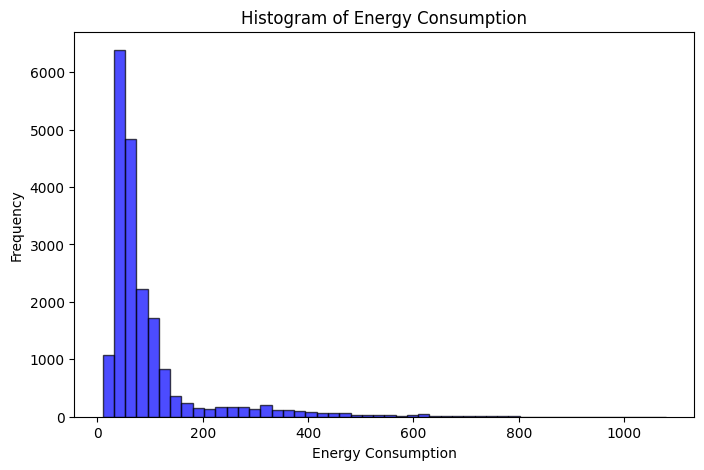

In [8]:
# 2.2.3: Histogram of energy consumption

plt.figure(figsize=(8, 5))
plt.hist(data['Appliances'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Histogram of Energy Consumption")
plt.show()


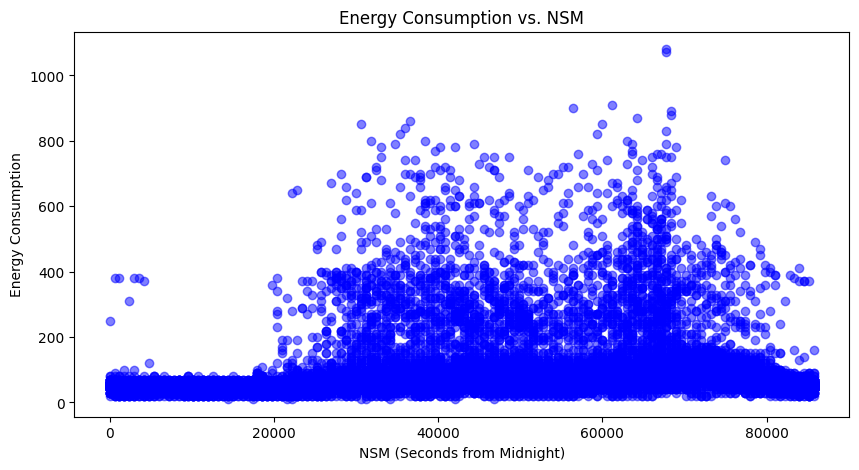

In [9]:
# 2.2.4: Defining NSM (Number of Seconds from Midnight) and plotting NSM vs. energy consumption

data['NSM'] = data.index.hour * 3600 + data.index.minute * 60 + data.index.second
plt.figure(figsize=(10, 5))
plt.scatter(data['NSM'], data['Appliances'], alpha=0.5, color='blue')
plt.xlabel("NSM (Seconds from Midnight)")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. NSM")
plt.show()



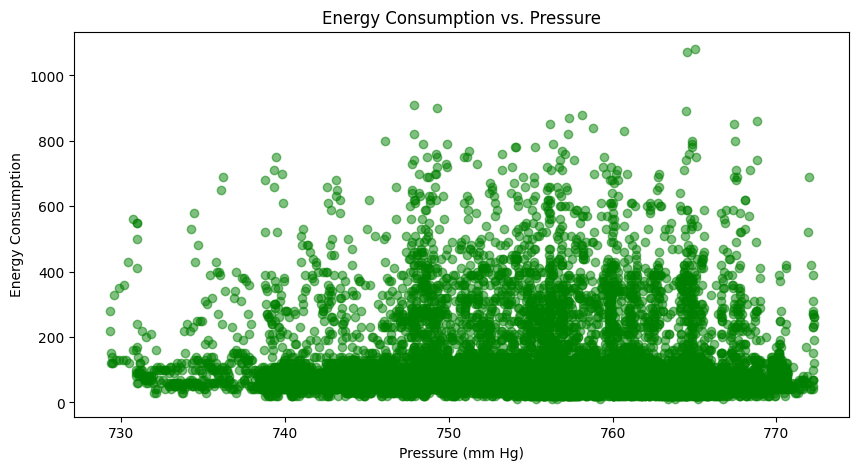

In [10]:
# 2.2.5: Plot energy consumption vs. Press mm Hg

plt.figure(figsize=(10, 5))
plt.scatter(data['Press_mm_hg'], data['Appliances'], alpha=0.5, color='green')
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. Pressure")
plt.show()



# **2.2.6: Comments on contributing factors**

According to the data, there is a substantial association between energy use and NSM (time of day) and pressure (mm Hg). Energy consumption usually increases in the mornings and evenings and follows a daily rhythm. Indirect effects of atmospheric pressure on appliance consumption may also arise from weather-related changes in indoor activity.

